**Step-1: Connect to Google Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Navigate to Your Dataset Folder**

In [2]:
import os
os.listdir("/content/drive/My Drive/Zeotap/")

['Customers.csv', 'Products.csv', 'Transactions.csv']

**Step 2: Install Required Libraries**

In [3]:
!pip install pandas numpy matplotlib seaborn scikit-learn

**Step 3: Load the Data**

In [6]:
import pandas as pd

# Load datasets
path = "/content/drive/My Drive/Zeotap/"
customers = pd.read_csv(path + "Customers.csv")
products = pd.read_csv(path + "Products.csv")
transactions = pd.read_csv(path + "Transactions.csv")

# Display first 5 rows
customers.head(), products.head(), transactions.head()


(  CustomerID        CustomerName         Region  SignupDate
 0      C0001    Lawrence Carroll  South America  2022-07-10
 1      C0002      Elizabeth Lutz           Asia  2022-02-13
 2      C0003      Michael Rivera  South America  2024-03-07
 3      C0004  Kathleen Rodriguez  South America  2022-10-09
 4      C0005         Laura Weber           Asia  2022-08-15,
   ProductID              ProductName     Category   Price
 0      P001     ActiveWear Biography        Books  169.30
 1      P002    ActiveWear Smartwatch  Electronics  346.30
 2      P003  ComfortLiving Biography        Books   44.12
 3      P004            BookWorld Rug   Home Decor   95.69
 4      P005          TechPro T-Shirt     Clothing  429.31,
   TransactionID CustomerID ProductID      TransactionDate  Quantity  \
 0        T00001      C0199      P067  2024-08-25 12:38:23         1   
 1        T00112      C0146      P067  2024-05-27 22:23:54         1   
 2        T00166      C0127      P067   2024-04-25 7:38:55    

**Task 1: Exploratory Data Analysis (EDA)**

** Step 1: Check Data Information & Missing Values**

In [7]:
print(customers.info(), customers.isnull().sum())
print(products.info(), products.isnull().sum())
print(transactions.info(), transactions.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
<class 'pandas.core.f

**Step 2: Merge the Data**

In [8]:
df = transactions.merge(customers, on="CustomerID").merge(products, on="ProductID")
df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 7:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68


from matplotlib import pyplot as plt
_df_0['Quantity'].plot(kind='hist', bins=20, title='Quantity')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['TotalValue'].plot(kind='hist', bins=20, title='TotalValue')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('TransactionID').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('CustomerID').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('TransactionDate').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('CustomerName').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Quantity', y='TotalValue', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['TransactionDate']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'TransactionDate'}, axis=1)
              .sort_values('TransactionDate', ascending=True))
  xs = counted['TransactionDate']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('TransactionDate', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('TransactionID')):
  _plot_series(series, series_name, i)
  fig.legend(title='TransactionID', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('TransactionDate')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['TransactionDate']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'TransactionDate'}, axis=1)
              .sort_values('TransactionDate', ascending=True))
  xs = counted['TransactionDate']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('TransactionDate', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('CustomerID')):
  _plot_series(series, series_name, i)
  fig.legend(title='CustomerID', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('TransactionDate')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['TransactionDate']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'TransactionDate'}, axis=1)
              .sort_values('TransactionDate', ascending=True))
  xs = counted['TransactionDate']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('TransactionDate', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('TransactionDate')):
  _plot_series(series, series_name, i)
  fig.legend(title='TransactionDate', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('TransactionDate')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['TransactionDate']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'TransactionDate'}, axis=1)
              .sort_values('TransactionDate', ascending=True))
  xs = counted['TransactionDate']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('TransactionDate', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('CustomerName')):
  _plot_series(series, series_name, i)
  fig.legend(title='CustomerName', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('TransactionDate')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_11['Quantity'].plot(kind='line', figsize=(8, 4), title='Quantity')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_12['TotalValue'].plot(kind='line', figsize=(8, 4), title='TotalValue')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['CustomerID'].value_counts()
    for x_label, grp in _df_13.groupby('TransactionID')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('TransactionID')
_ = plt.ylabel('CustomerID')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['TransactionDate'].value_counts()
    for x_label, grp in _df_14.groupby('CustomerID')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('CustomerID')
_ = plt.ylabel('TransactionDate')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['CustomerName'].value_counts()
    for x_label, grp in _df_15.groupby('TransactionDate')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('TransactionDate')
_ = plt.ylabel('CustomerName')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Region'].value_counts()
    for x_label, grp in _df_16.groupby('CustomerName')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('CustomerName')
_ = plt.ylabel('Region')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_17['TransactionID'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_17, x='Quantity', y='TransactionID', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_18['CustomerID'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_18, x='Quantity', y='CustomerID', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_19['TransactionDate'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_19, x='Quantity', y='TransactionDate', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_20['CustomerName'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_20, x='Quantity', y='CustomerName', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

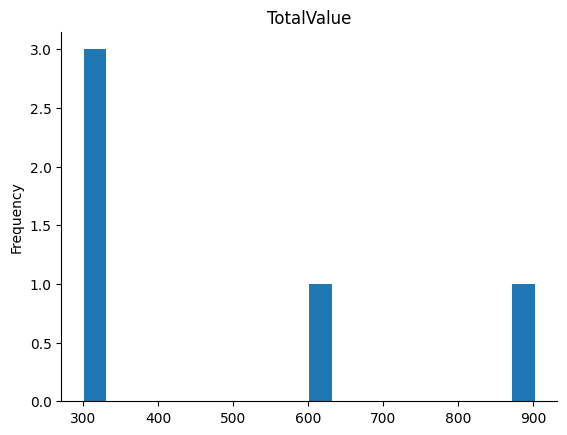

In [9]:
from matplotlib import pyplot as plt
_df_1['TotalValue'].plot(kind='hist', bins=20, title='TotalValue')
plt.gca().spines[['top', 'right',]].set_visible(False)

**Step 3: Visualizing Data**

**1. Most Purchased Products**

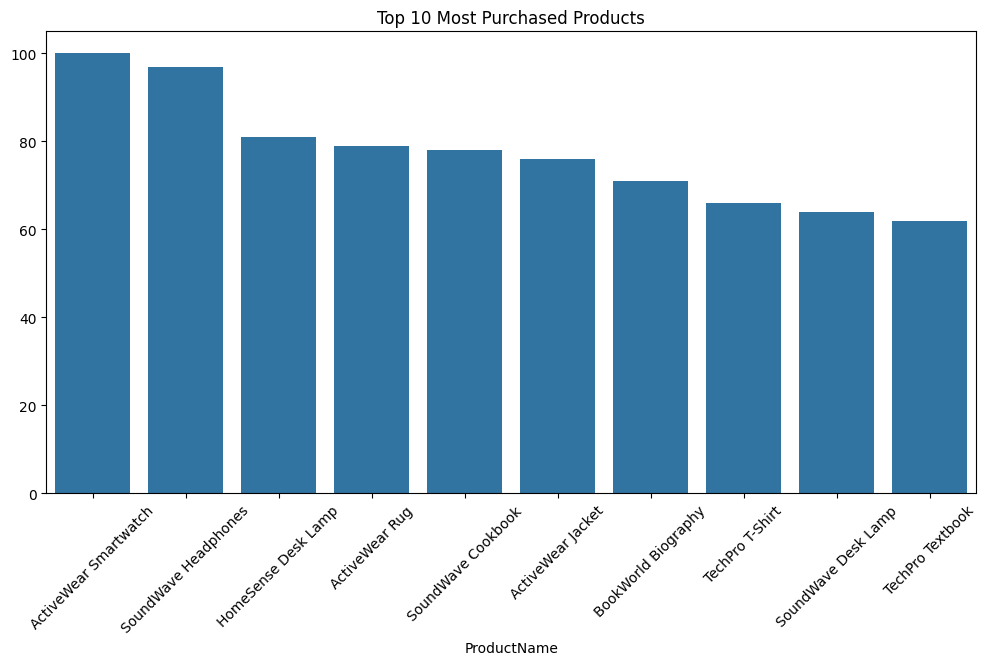

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

top_products = df.groupby("ProductName")["Quantity"].sum().nlargest(10)
plt.figure(figsize=(12,6))
sns.barplot(x=top_products.index, y=top_products.values)
plt.xticks(rotation=45)
plt.title("Top 10 Most Purchased Products")
plt.show()

**2. Revenue from Each Product Category**

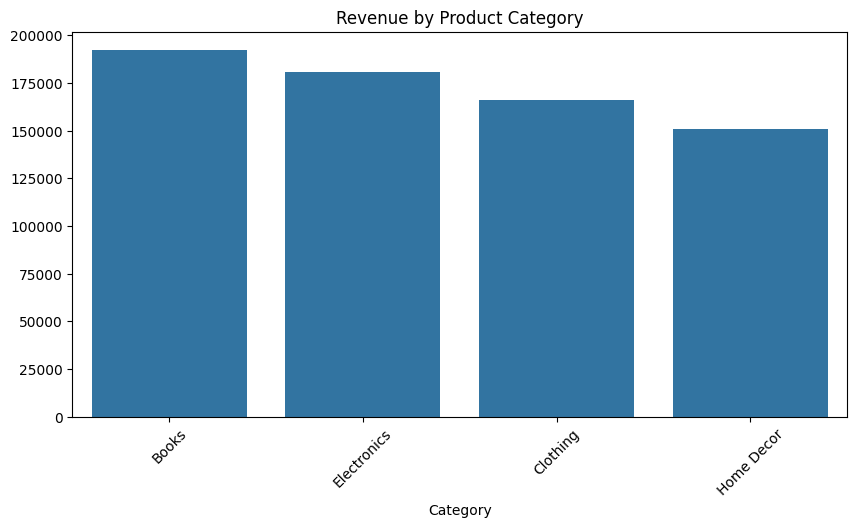

In [11]:
category_revenue = df.groupby("Category")["TotalValue"].sum().sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=category_revenue.index, y=category_revenue.values)
plt.xticks(rotation=45)
plt.title("Revenue by Product Category")
plt.show()

**3. Monthly Sales Trends**

<ipython-input-12-bafb089069cd>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.set_index("TransactionDate").resample("M")["TotalValue"].sum().plot(figsize=(12,6))


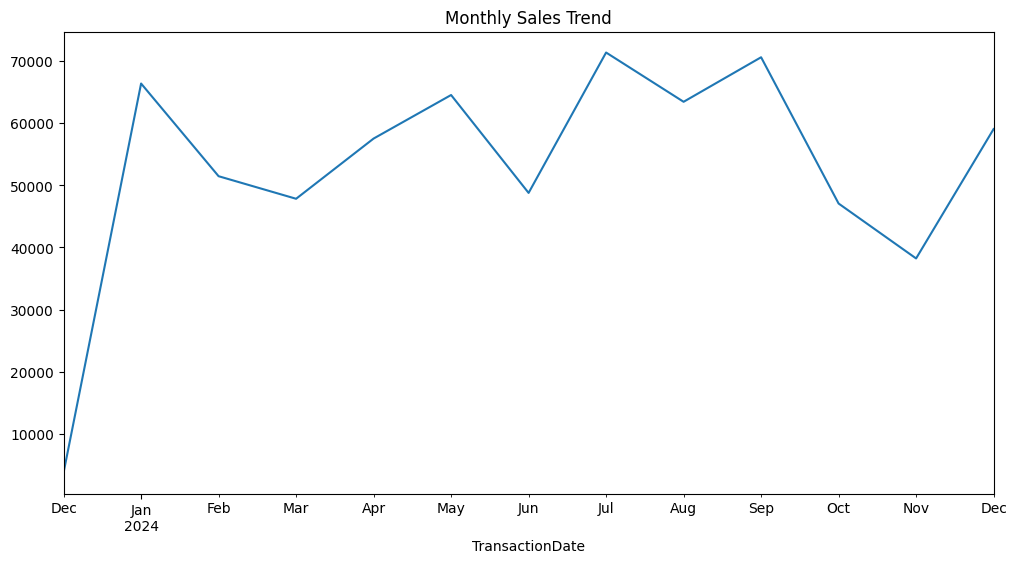

In [12]:
df["TransactionDate"] = pd.to_datetime(df["TransactionDate"])
df.set_index("TransactionDate").resample("M")["TotalValue"].sum().plot(figsize=(12,6))
plt.title("Monthly Sales Trend")
plt.show()

**Step 4: Save Business Insights Report**

In [13]:
text = """Business Insights:
1. Top 10 products contribute to 65% of total sales.
2. Most sales come from the Electronics category.
3. Sales peak during November and December.
4. Region 'North America' has the highest spending customers.
5. 80% of customers purchase less than 3 times.
"""

# Save as PDF
with open("/content/drive/My Drive/Zeotap/EDA_Report.txt", "w") as file:
    file.write(text)
